# Введение в Data Science и машинное обучение
https://stepik.org/course/4852/syllabus

In [1]:
import pandas as pd
import numpy as np

In [2]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

#### Вывод первых и последних 5 строк

In [3]:
students_performance.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_performance.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Вывод описательных статистик для количественных данных

In [5]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Вывод типов данных

In [6]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Размер данных (число строк и колонок)

In [7]:
students_performance.shape

(1000, 8)

In [8]:
students_performance.size

8000

### Методы (со скобками) позволяют преобразовать данные, а атрибуты (.shape и .dtypes и т.п.) позволяют посмотреть, что в этих данных хранится, узнать информацию о них, что лежит в каком-то столбце и колонке

In [9]:
students_performance.groupby('gender').aggregate({'writing score': 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


**iloc** - integer location (номер позиции колонки или строки)

In [10]:
# первые 5 наблюдений и первые 3 столбца
students_performance.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


Дополнительные скобки, потому что ищем много значений (обернули в список)

In [11]:
# -1 это первая с конца, -2 и -3 аналогично
students_performance.iloc[[0, 3, 10], [0, 5, -1]]

,gender,math score,writing score
0,female,72,74
3,male,47,44
10,male,58,52


**Индекс** в pandas - название строки, её нумерация

In [12]:
# делаем subset датафрейма
students_performance_with_names = students_performance.iloc[[0, 3, 4, 7, 8]]

In [13]:
students_performance_with_names.index = ["Anastasia", "Oleg", "Nikolay", "Andrei", "Victor"]

Индексы стали содержательнее

In [14]:
students_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Anastasia,female,group B,bachelor's degree,standard,none,72,72,74
Oleg,male,group A,associate's degree,free/reduced,none,47,57,44
Nikolay,male,group C,some college,standard,none,76,78,75
Andrei,male,group B,some college,free/reduced,none,40,43,39
Victor,male,group D,high school,free/reduced,completed,64,64,67


In [15]:
students_performance_with_names.loc[['Anastasia', 'Nikolay']]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Anastasia,female,group B,bachelor's degree,standard,none,72,72,74
Nikolay,male,group C,some college,standard,none,76,78,75


In [16]:
students_performance_with_names.loc[['Anastasia', 'Nikolay'], ['gender', 'writing score']]

,gender,writing score
Anastasia,female,74
Nikolay,male,75


### Серия и датафрейм

In [17]:
students_performance_with_names.iloc[:, 0] # все строки первой колонки

Anastasia    female
Oleg           male
Nikolay        male
Andrei         male
Victor         male
Name: gender, dtype: object

In [18]:
type(students_performance_with_names.iloc[:, 0]) # серия (одномерный массив), а не DataFrame

pandas.core.series.Series

In [19]:
type(students_performance_with_names.iloc[0:5, 0:3])

pandas.core.frame.DataFrame

In [20]:
series1 = pd.Series([1, 2, 3], index = ["Anastasia", "Oleg", "Nikolay"])
series2 = pd.Series([4, 5, 6], index = ["Anastasia", "Oleg", "Nikolay"])

pd.DataFrame({'col_name1': series1, 'col_name2': series2}) # то есть датафрейм - набор серий (столбцов), 
#каждая колонка - пандовская серия

,col_name1,col_name2
Anastasia,1,4
Oleg,2,5
Nikolay,3,6


## Наглядное отличие серии [  ] и датафрейма [[  ]]

"Возьми, что лежит по названию gender" (пандовская серия)

In [21]:
students_performance_with_names['gender'] # обратились по названию переменной и получили пандовскую серию

Anastasia    female
Oleg           male
Nikolay        male
Andrei         male
Victor         male
Name: gender, dtype: object

In [22]:
students_performance_with_names['gender'].shape

(5,)

"Возьми от всего датафрейма только первую колонку"

In [23]:
students_performance_with_names[['gender']] # взяли только первую колонку датафрейма

,gender
Anastasia,female
Oleg,male
Nikolay,male
Andrei,male
Victor,male


In [24]:
students_performance_with_names[['gender']].shape

(5, 1)

## Датасет Титаник

In [25]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

## Вывод ВСЕЙ информации

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Колонки

In [27]:
# названия колонок
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
# тип колонок и их количество
titanic.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

# Фильтрация данных

In [29]:
# сравнение пандовской серии со значением
students_performance.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [30]:
students_performance.loc[students_performance.gender == 'female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
students_performance.loc[students_performance.gender == 'female', ['gender', 'math score']]

,gender,math score
0,female,72
1,female,69
2,female,90
5,female,71
6,female,88
...,...,...
993,female,62
995,female,88
997,female,59
998,female,68


#### Строки, где writing score > среднего в датафрейме

In [32]:
writing_mean = students_performance['writing score'].mean()
writing_mean

68.054

In [33]:
students_performance.loc[students_performance['writing score'] > writing_mean, ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
4,male,75
5,female,78
...,...,...
992,female,76
993,female,74
995,female,95
998,female,77


### Комбинирование условий через &, а не and

In [34]:
query = (students_performance['writing score'] > writing_mean) & (students_performance.gender == 'female')
query

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [35]:
students_performance.loc[query]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [36]:
# У какой доли студентов из датасэта в колонке lunch указано free/reduced? 0.355
students_performance[students_performance['lunch'] == 'free/reduced'].count() # 355 значений из 1000

gender                         355
race/ethnicity                 355
parental level of education    355
lunch                          355
test preparation course        355
math score                     355
reading score                  355
writing score                  355
dtype: int64

In [37]:
# подсчёт доли
len(students_performance[students_performance['lunch'] == 'free/reduced'])/len(students_performance)

0.355

#### Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [38]:
students_performance[students_performance['lunch'] == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [39]:
students_performance[students_performance['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


### Дисперсия

In [40]:
students_performance.groupby('lunch').var()

,math score,reading score,writing score
lunch,,,
free/reduced,229.824270,221.871139,238.202881
standard,186.418089,191.285560,205.620887


1. Студенты со стандартным ланчем имеют в среднем более хорошие оценки
2. Дисперсия оценок студентов со стандартным ланчем меньше

## Метод query
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

## Переименовать колонки (удаление пробелов)

In [41]:
students_performance = students_performance\
                                    .rename(columns=
                                            {'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})

или

In [42]:
students_performance.columns = [x.replace(" ", "_") for x in students_performance.columns]

In [43]:
students_performance.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [44]:
students_performance.query("gender == 'female' | writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Сравнение с переменной с помощью экранирования @

In [45]:
writing_mean = students_performance['writing_score'].mean()
students_performance.query("writing_score > @writing_mean")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


### Отбор нужных колонок

In [46]:
score_columns = [i for i in list(students_performance) if 'score' in i]
score_columns

['math_score', 'reading_score', 'writing_score']

In [47]:
students_performance[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


Второй способ

## Метод filter 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html

**like** - "содержит в себе"

In [48]:
students_performance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


## axis 1 - столбцы (по умолчанию), 0 - строки
Можно использовать columns и index

In [49]:
# имена с буквой е
students_performance_with_names.filter(like='e', axis = 0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Oleg,male,group A,associate's degree,free/reduced,none,47,57,44
Andrei,male,group B,some college,free/reduced,none,40,43,39


Аргумент like отбирает те лэйблы, где встречается поданное значение

Аргумент regex отбирает лэйблы, подходящие к переданному паттерну

Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки

Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения

Можно использовать только один из аргументов items, like, regex

# Группировка и агрегация

Результат - пандовский датафрейм, индексы - переменные, по которым проводили агрегацию.
Аргумент as_index=False результирующую переменную переставляет в колонку.

In [50]:
# среднее значение количественных переменных для группирующей переменной
students_performance.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [51]:
# aggregate - какие переменные хотим использовать и что узнать
students_performance.groupby('gender').aggregate({'math_score': 'mean', 'reading_score': 'mean'})

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


### as_index=False
Теперь gender не индекс

In [52]:
students_performance.groupby('gender', as_index=False).aggregate({'math_score': 'mean', 'reading_score': 'mean'})

,gender,math_score,reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


Переименовали колонки

In [53]:
students_performance.groupby('gender', as_index=False).aggregate(mean_math =('math_score', 'mean'), mean_reading =('reading_score', 'mean'))

,gender,mean_math,mean_reading
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [54]:
students_performance.groupby('gender', as_index=False).aggregate({'math_score': ['mean'],'reading_score': ['min', 'max']})

gender math_score reading_score     
                mean           min  max
0  female  63.633205            17  100
1    male  68.728216            23  100

In [55]:
students_performance.groupby('gender')[['math_score', 'reading_score', 'writing_score']].agg([np.mean, np.median])

math_score        reading_score        writing_score       
             mean median          mean median          mean median
gender                                                            
female  63.633205   65.0     72.608108   73.0     72.467181   74.0
male    68.728216   69.0     65.473029   66.0     63.311203   64.0

### Группировка по нескольким переменным

Составные индексы:
**Преимущества мультииндексов:** колонки - пандовские серии  и у них есть методы.

Сколько уникальных оценок по математике на пересечении двух групп?
Результат - сгруппированная серия

In [56]:
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [57]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']).aggregate({'math_score': 'mean','reading_score':'mean'})\
.rename(columns = {'math_score': 'mean_math', 'reading_score': 'mean_reading'})
mean_scores

mean_math  mean_reading
gender race/ethnicity                         
female group A         58.527778     69.000000
       group B         61.403846     71.076923
       group C         62.033333     71.944444
       group D         65.248062     74.046512
       group E         70.811594     75.840580
male   group A         63.735849     61.735849
       group B         65.930233     62.848837
       group C         67.611511     65.424460
       group D         69.413534     66.135338
       group E         76.746479     70.295775

Достаем несколько значений по индексу (по двум строкам)

In [58]:
mean_scores.loc[[('female','group A'),('female', 'group B')]]

mean_math  mean_reading
gender race/ethnicity                         
female group A         58.527778     69.000000
       group B         61.403846     71.076923

Выглядит сложно и неудобно, лучше добавить as_index=False

In [59]:
students_performance.groupby(['gender', 'race/ethnicity'], as_index=False).aggregate({'math_score': 'mean','reading_score':'mean'})\
.rename(columns = {'math_score': 'mean_math', 'reading_score': 'mean_reading'})

,gender,race/ethnicity,mean_math,mean_reading
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


### Сортировка в порядке возрастания и убывания переменных

In [60]:
students_performance.sort_values(['gender', 'math_score'], ascending=[True, False])

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90
...,...,...,...,...,...,...,...,...
211,male,group C,some college,free/reduced,none,35,28,27
76,male,group E,some high school,standard,none,30,26,22
596,male,group B,high school,free/reduced,none,30,24,15
327,male,group A,some college,free/reduced,none,28,23,19


## Метод sort_values
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [61]:
# топ-5 математиков девушек и парней
students_performance.sort_values(['gender', 'math_score'], ascending = False).groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


## Создание новых колонок датафрейма

['название одной колонки'] = преобразование

In [62]:
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score + students_performance.writing_score
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Метод assign для более сложных преобразований

In [63]:
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


## Удаление колонок

In [64]:
students_performance.drop(['total_score_log'], axis=1) # axis = 1 говорит, что это название колонки, а не строки

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


# Визуализация, seaborn

Надстройка над matplotlib с более простым синтаксисом

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

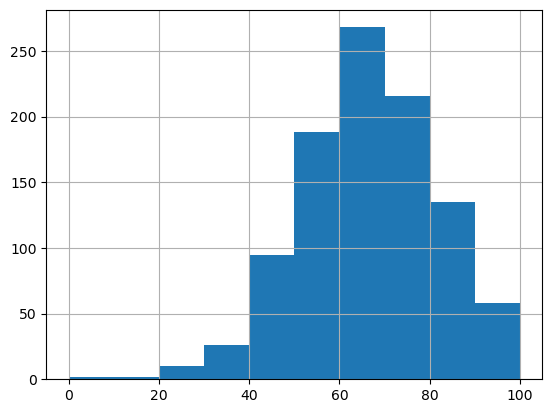

In [84]:
# гистограмма распределения баллов по математике 
# совмещаем pandas и matplotlib
students_performance.math_score.hist()

In [85]:
students_performance.math_score.mean()

66.089

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

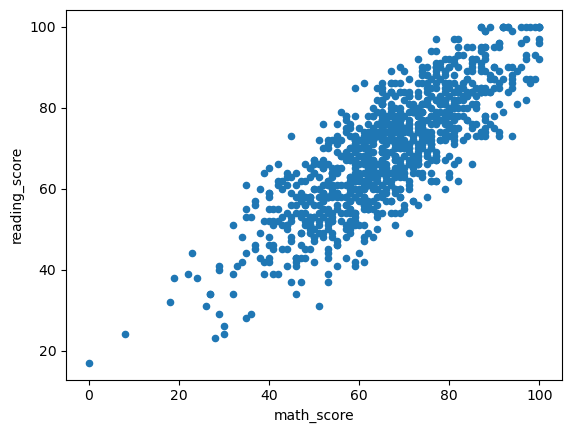

In [86]:
students_performance.plot.scatter(x='math_score', y='reading_score') # график корреляции, matplotlib

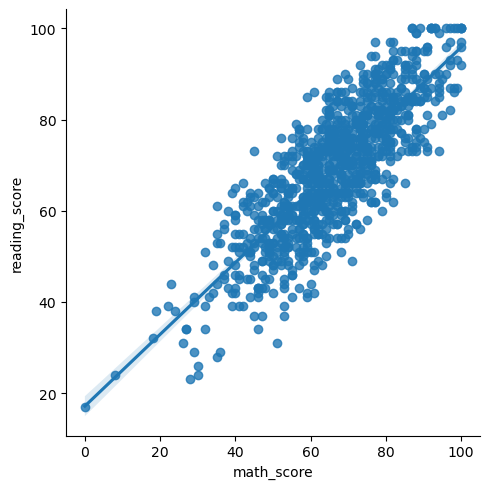

In [87]:
sns.lmplot(x='math_score', y='reading_score', data=students_performance)

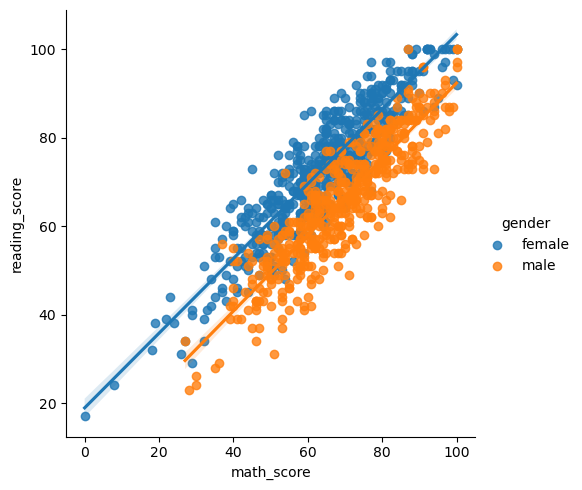

In [88]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance) # hue - группирующая переменная

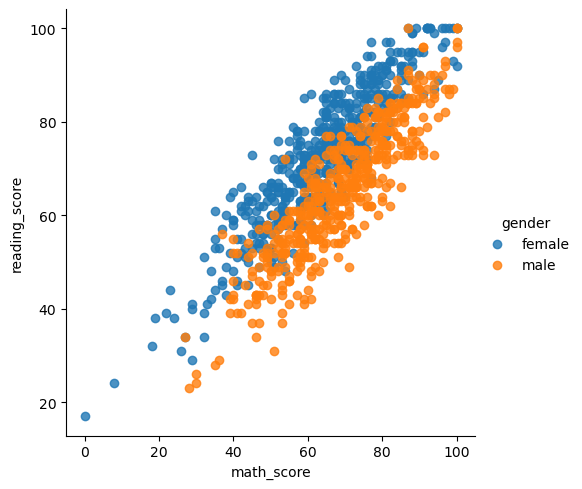

In [89]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)

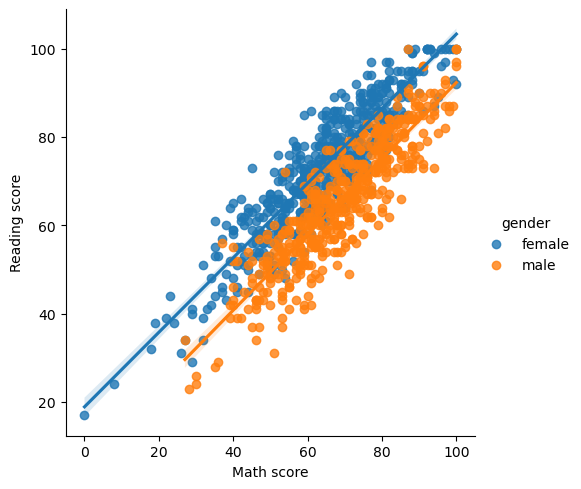

In [90]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance) # hue - группирующая переменная
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

## Графики

In [93]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


Зависимость зарплаты от даты

<AxesSubplot:>

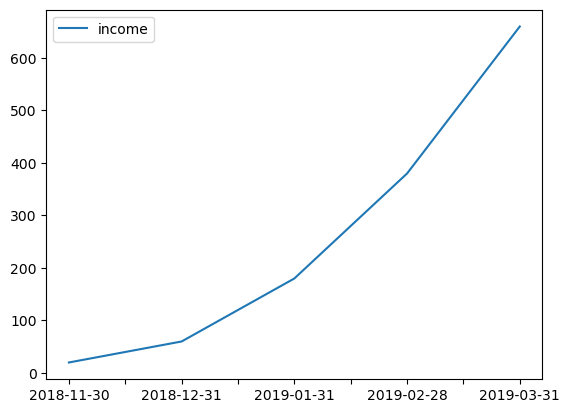

In [99]:
# Любой из вариантов
df.plot(kind='line')
df['income'].plot()
sns.lineplot(x=df.index, y=df.income)
df.income.plot()
df.plot()
sns.lineplot(data=df)
plt.plot(df.index, df.income)

<AxesSubplot:xlabel='x', ylabel='y'>

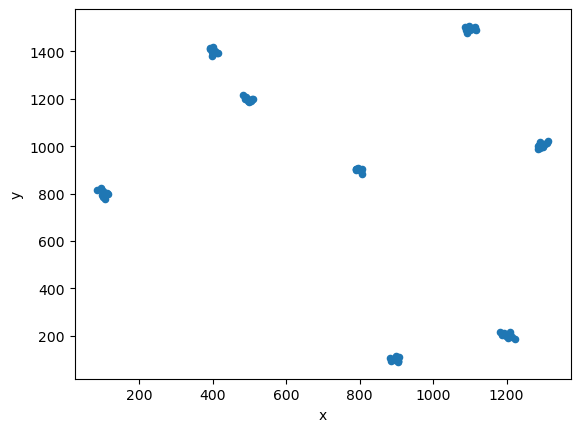

In [102]:
#df = pd.read_csv("C:\\Users\\DNS\\Desktop\\dataset.txt", sep=" ")
#df.plot.scatter(x='x', y='y')

#df = pd.read_csv('path_to_dataset', sep=' ', header=None)
#sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

## Датасет Дота

In [132]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [133]:
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


Сгруппируйте героев из датасэта по числу их ног (колонка legs)

In [134]:
dota.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [135]:
dota['legs'].value_counts().to_frame()

,legs
2,95
0,11
4,7
6,3
8,1


In [136]:
dota.groupby(['legs']).nunique()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,2,11,11,11,3,11
2,95,2,95,95,95,3,81
4,7,2,7,7,7,3,7
6,3,2,3,3,3,3,3
8,1,1,1,1,1,1,1


Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [137]:
dota.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [143]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
dota.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [145]:
dota['count'] = dota['roles'].str.count(',') + 1
dota.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,count
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:>

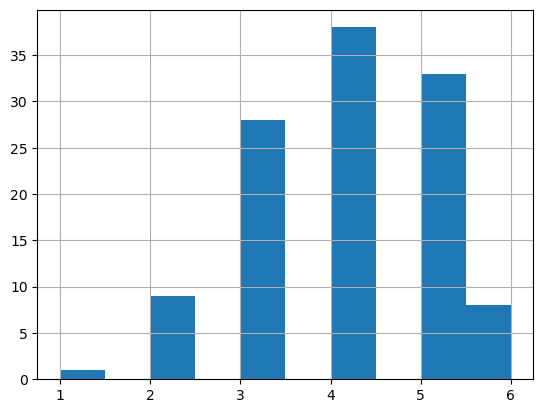

In [147]:
dota['count'].hist()
# dota.roles.apply(lambda k: len(eval(k))).hist()

In [150]:
dota.mode()['count'][0] # наиболее частое значение 

4.0

In [153]:
dota['roles'].str.split(",").str.len().value_counts() 
# str.split(",") -  список слов, str.len() - длина списка, value_counts()  - подсчет

4    38
5    33
3    28
2     9
6     8
1     1
Name: roles, dtype: int64

## Датасет Лупа и Пупа

In [68]:
salary = pd.read_csv("https://stepik.org/media/attachments/course/4852/accountancy.csv")

In [69]:
salary.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type).

In [70]:
salary.groupby(['Executor','Type'])[['Salary']].agg([np.mean])

Salary
                     mean
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [71]:
salary.groupby(['Executor','Type'])[['Salary']].agg([np.mean]).unstack()

Salary                                                   
                mean                                                   
Type               A           B           C           D      E       F
Executor                                                               
Loopa      58.000000  145.166667  154.333333  137.714286  164.0  238.00
Pupa      160.833333   77.000000   74.500000  146.500000  131.2  136.25

In [72]:
pd.pivot_table(salary, index=["Type", "Executor"], aggfunc=np.mean)

Salary  Unnamed: 0
Type Executor                        
A    Loopa      58.000000   46.000000
     Pupa      160.833333   16.000000
B    Loopa     145.166667   24.000000
     Pupa       77.000000   41.000000
C    Loopa     154.333333   31.666667
     Pupa       74.500000   23.000000
D    Loopa     137.714286   31.857143
     Pupa      146.500000   14.000000
E    Loopa     164.000000   23.500000
     Pupa      131.200000   19.800000
F    Loopa     238.000000   20.000000
     Pupa      136.250000   25.750000

## Датасет Водоросли

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! 

In [73]:
seaweed = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
seaweed.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [74]:
mean_concentrations = seaweed.groupby(['genus']).mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


Пользуясь предыдущими данными, укажите чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus.

In [75]:
seaweed.groupby(['genus']).aggregate({'alanin': ['min','mean','max']})

alanin                    
                  min      mean       max
genus                                    
Ascophyllum  0.875429  0.875429  0.875429
Cladophora   1.648450  3.997055  6.881024
Fucus        0.346431  3.566411  6.641303
Palmaria     3.176440  3.176440  3.176440
Saccharina   1.255251  3.524207  5.793163

In [76]:
seaweed.loc[seaweed.genus == 'Fucus'].groupby(['genus']).aggregate({'alanin': ['min','mean','max']}).round(2)

alanin            
         min  mean   max
genus                   
Fucus   0.35  3.57  6.64

0.35 3.57 6.64

In [77]:
# Число видов бурых, зелёных и красных водорослей
seaweed.groupby(['group']).count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [78]:
seaweed.groupby('group').agg({'sucrose':['max']})

,sucrose
,max
group,
brown,6.825467
green,5.712284
red,0.704580


In [79]:
seaweed.groupby('group').agg({'sucrose':['min']})

,sucrose
,min
group,
brown,1.636122
green,2.452623
red,0.704580


In [80]:
# Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
seaweed.groupby('group')['sucrose'].max().values-seaweed.groupby('group')['sucrose'].min().values

array([5.18934479, 3.25966156, 0.        ])

In [81]:
seaweed.groupby('group').var()

,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,
brown,5.459098,7.220351,5.468942,1.767756,4.385233
green,2.672626,7.059917,3.950113,0.266265,0.540388
red,NaN,NaN,NaN,NaN,NaN


In [82]:
# Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях
seaweed.groupby('group')['citrate'].var().to_frame()

,citrate
group,
brown,5.468942
green,3.950113
red,NaN


## Датасет Растения

In [103]:
genome = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv')
genome.head()

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


Мешает столбец Unnamed:0, т.к. там не числа

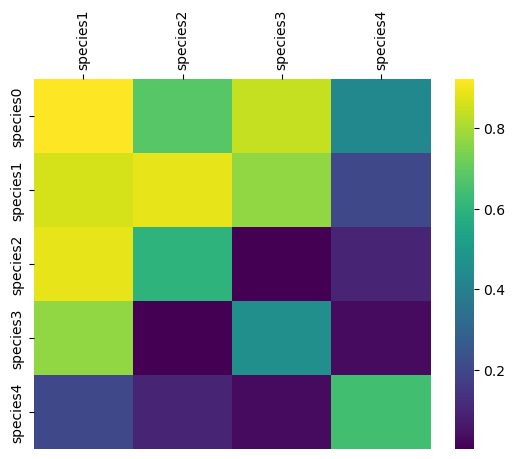

In [128]:
g = sns.heatmap(genome.iloc[:, 1:], cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

ИЛИ

In [129]:
genome = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
genome.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


Уже не надо использовать iloc

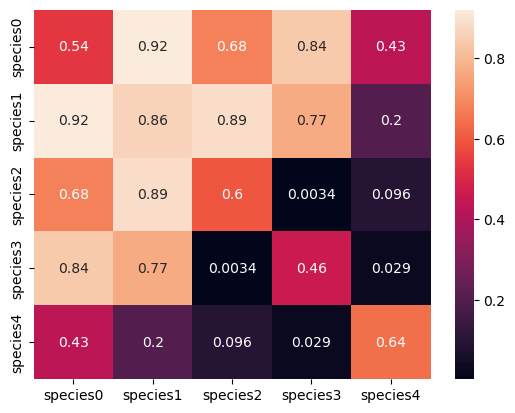

In [130]:
g = sns.heatmap(genome, annot=True)

## Датасет Ирисы

Скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

In [160]:
iris = pd.read_csv('http://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:ylabel='Density'>

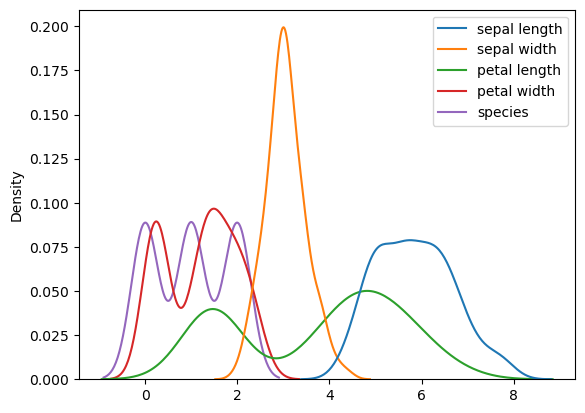

In [178]:
sns.kdeplot(data=iris)

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

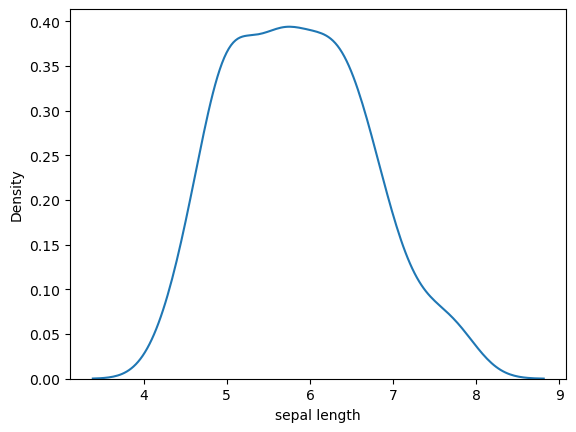

In [177]:
sns.kdeplot(data=iris, x="sepal length") # отдельная колонка

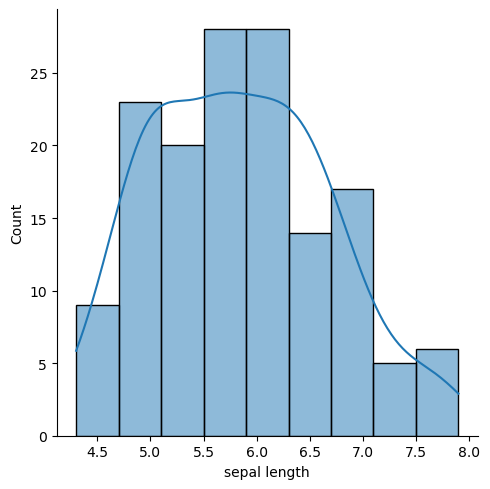

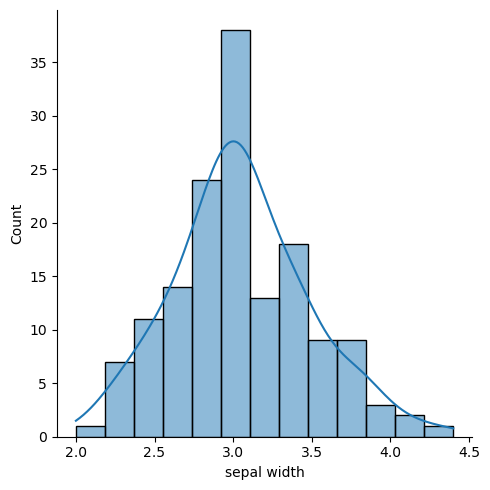

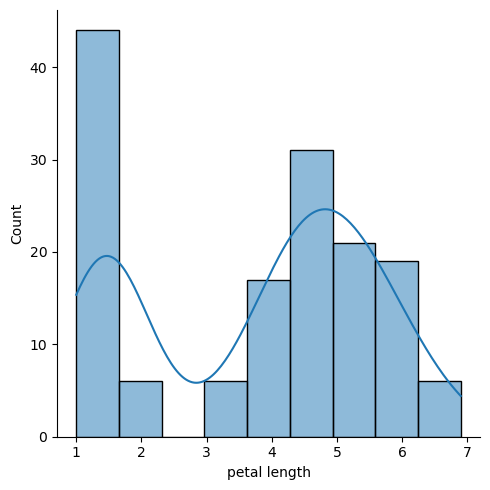

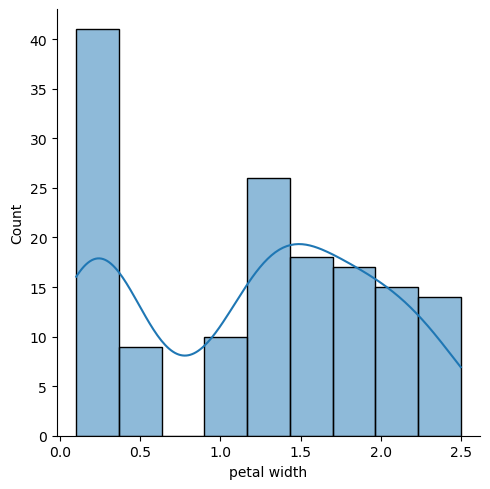

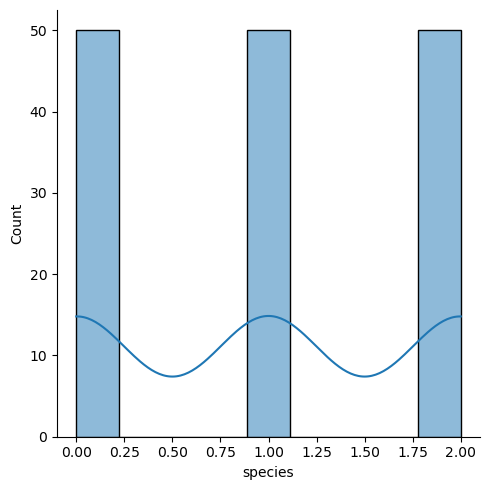

In [176]:
for column in iris:
    sns.displot(iris, x=column, kde=True)

**Вывод:**  
- Sepal width и sepal length имеют унимодальное распределение
- Petal length имеет наибольший размах значений
- Petal width и petal length имеют бимодальное распределение

https://seaborn.pydata.org/generated/seaborn.kdeplot.html  
https://seaborn.pydata.org/generated/seaborn.distplot.html заменили на histplot, displot

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

https://seaborn.pydata.org/generated/seaborn.violinplot.html

<AxesSubplot:xlabel='petal length'>

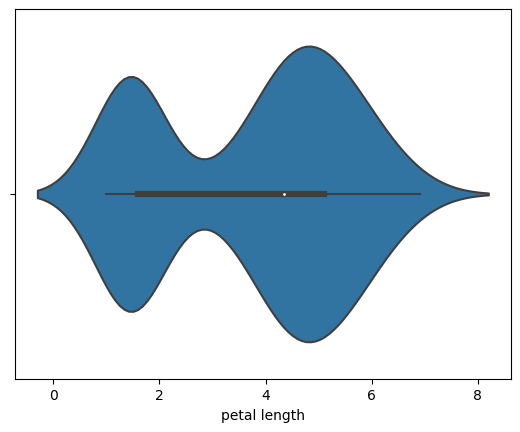

In [179]:
sns.violinplot(x=iris["petal length"]) # длина лепестков

<AxesSubplot:ylabel='petal length'>

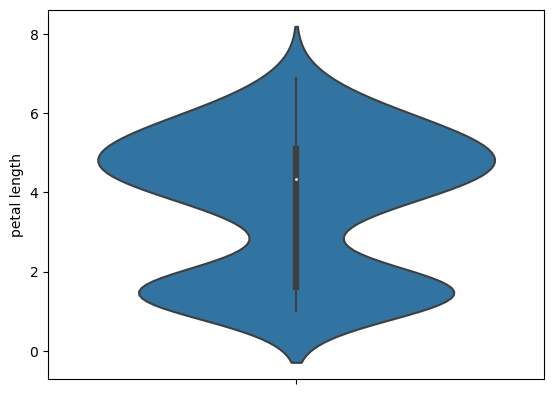

In [180]:
sns.violinplot(y=iris["petal length"]) # длина лепестков

In [181]:
iris.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


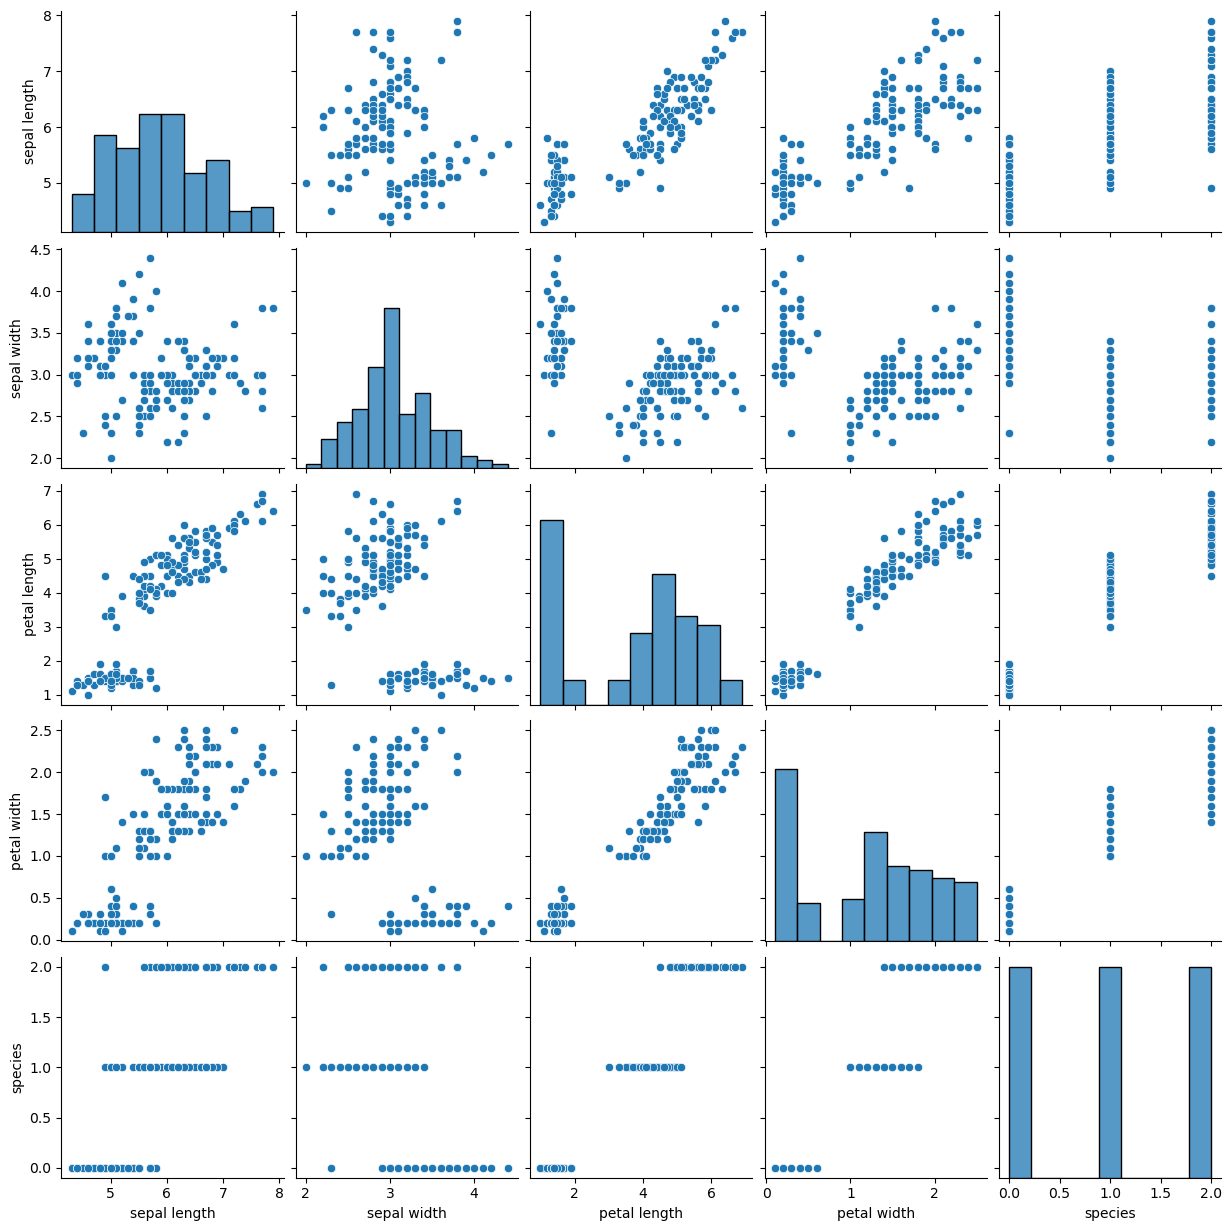

In [182]:
sns.pairplot(iris)

Наибольшая корреляция: petal width и petal length

In [183]:
my_data = {'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]}
my_data = pd.DataFrame(data=my_data)
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23
